In [1]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.2 MB/s eta 0:00:00


## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# View the complete diversity of of data within each column
application_df_cat = application_df.dtypes.index.tolist()
print(f"application_df feature counts:")
application_df[application_df_cat].nunique()

application_df feature counts:


EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

After going though the data once with the 'EIN' and 'NAME' columns dropped, the model was limited to 73% accuracy.  Going back to the number of unique values for the entire dataset, the 'NAME' category had enough information to bin appropriately.  The following was done in tandom to directly compare the training behavior and results.

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
working_df_1 = application_df.copy()
working_df_2 = application_df.copy()
working_df_1.drop(columns = ['EIN', 'NAME'], inplace = True)
working_df_2.drop(columns = ['EIN'], inplace = True)
display(working_df_1.head())
display(working_df_2.head())

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Determine the number of unique values in each column.
working_1_cat = working_df_1.dtypes.index.tolist()
print(f"working_df_1 feature counts:")
display(working_df_1[working_1_cat].nunique())
print('------------------')
working_2_cat = working_df_2.dtypes.index.tolist()
print(f"working_df_2 feature counts:")
display(working_df_2[working_2_cat].nunique())

working_df_1 feature counts:


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

------------------
working_df_2 feature counts:


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
display(working_df_1['APPLICATION_TYPE'].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced

# Concerned about scaling, so utilized vectorized Pandas operations: https://tryolabs.com/blog/2023/02/08/top-5-tips-to-make-your-pandas-code-absurdly-fast
# Create function to serve as a cutoff and chance an items name to 'other'
def cutoff_other(df, column_name, threshold):
    # Create new temporary column to count grouped values.  Nees fo use string formatting to pass the column_name into the {} placeholder
    # https://docs.python.org/3/library/string.html#format-string-syntax
    df['{}_count'.format(column_name)] = df.groupby(column_name)[column_name].transform('count')

    # For all items with a count below the threshold, change name to 'other'
    df.loc[df['{}_count'.format(column_name)] < threshold, column_name] = 'other'

    #drop the temporary count column
    df.drop('{}_count'.format(column_name), axis=1, inplace=True)
    return df



In [9]:
# Change name of Application types to 'other' if below the cutoff threshold
cutoff_other(working_df_1, 'APPLICATION_TYPE',500)
cutoff_other(working_df_2, 'APPLICATION_TYPE',500)
# Check to make sure binning was successful
working_df_1['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
working_df_1['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1

working_df_1['CLASSIFICATION'].value_counts().loc[lambda x : x > 1 ]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Use same function to determine items to change to 'other' depending on a cutoff value
cutoff_other(working_df_1,'CLASSIFICATION',1000)
cutoff_other(working_df_2,'CLASSIFICATION',1000)
working_df_1['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Lets do the sname for the 'NAMES' feature in working_df_2
working_df_2['NAME'].value_counts().loc[lambda x : x > 50 ]

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [14]:
cutoff_other(working_df_2, 'NAME',5)
working_df_2['NAME'].value_counts()

other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
# Create list of all columns with 'object' dtypes
encode_1_col = working_df_1.dtypes[working_df_1.dtypes =='object'].index.tolist()
encode_2_col = working_df_2.dtypes[working_df_2.dtypes =='object'].index.tolist()

# Create df of dummies from categorical columns
encode_1_df = pd.get_dummies(working_df_1[encode_1_col])
encode_2_df = pd.get_dummies(working_df_2[encode_2_col])
# encode_df


In [16]:
working_1_concat_df = pd.concat([working_df_1, encode_1_df], axis = 1)
working_2_concat_df = pd.concat([working_df_2, encode_2_df], axis = 1)

# working_concat_df.info()
working_df_1_cleaned = working_1_concat_df.drop(columns = encode_1_col)
working_df_2_cleaned = working_2_concat_df.drop(columns = encode_2_col)

In [17]:
display(working_df_1_cleaned.head())
print()
display(working_df_1_cleaned.info())

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   IS_SUCCESSFUL                 34299 non-null  int64
 3   APPLICATION_TYPE_T10          34299 non-null  uint8
 4   APPLICATION_TYPE_T19          34299 non-null  uint8
 5   APPLICATION_TYPE_T3           34299 non-null  uint8
 6   APPLICATION_TYPE_T4           34299 non-null  uint8
 7   APPLICATION_TYPE_T5           34299 non-null  uint8
 8   APPLICATION_TYPE_T6           34299 non-null  uint8
 9   APPLICATION_TYPE_T7           34299 non-null  uint8
 10  APPLICATION_TYPE_T8           34299 non-null  uint8
 11  APPLICATION_TYPE_other        34299 non-null  uint8
 12  AFFILIATION_CompanySponsored  34299 non-null  uint8
 13  AFFILIATION_Family/Parent     

None

In [18]:
display(working_df_2_cleaned.head())
print()
display(working_df_2_cleaned.info())

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 447 entries, STATUS to SPECIAL_CONSIDERATIONS_Y
dtypes: int64(3), uint8(444)
memory usage: 15.3 MB


None

In [19]:
# Split our preprocessed data into our features and target arrays
y_1 = working_df_1_cleaned['IS_SUCCESSFUL']
X_1 = working_df_1_cleaned.drop(columns = ['IS_SUCCESSFUL'])
y_2 = working_df_2_cleaned['IS_SUCCESSFUL']
X_2 = working_df_2_cleaned.drop(columns = ['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, random_state=42)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, random_state=42)

In [20]:
# Create a StandardScaler instances
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

# Fit the StandardScaler
X_1_scaler = scaler_1.fit(X_1_train)
X_2_scaler = scaler_2.fit(X_2_train)

# Scale the data
X_1_train_scaled = X_1_scaler.transform(X_1_train)
X_1_test_scaled = X_1_scaler.transform(X_1_test)
X_2_train_scaled = X_2_scaler.transform(X_2_train)
X_2_test_scaled = X_2_scaler.transform(X_2_test)

## Compile, Train and Evaluate the Model

In [21]:
# Influenced by In-class Activity Module 21.2 'tune_up_solution' and Keras docs: https://www.tensorflow.org/tutorials/keras/keras_tuner
# Create a method that creates a new Sequential model with hyperparameter options
def create_model_1(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'tanh', 'sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=len(X_1_train_scaled[0]),
        step=5), activation=activation, input_dim=len(X_1_train_scaled[0]))
    )

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=len(X_1_train_scaled[0]),
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

     # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

def create_model_2(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'tanh', 'sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=len(X_2_train_scaled[0]),
        step=5), activation=activation, input_dim=len(X_2_train_scaled[0]))
    )

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=len(X_2_train_scaled[0]),
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [22]:
# Define the tuner
tuner_1 = kt.Hyperband(
    create_model_1,
    objective="val_accuracy",
    directory='model_without_names_v10',
    project_name= 'Model_1',
    max_epochs=10,
    hyperband_iterations=5)

tuner_2 = kt.Hyperband(
    create_model_2,
    objective="val_accuracy",
    directory='model_with_names_v10',
    project_name= 'Model_2',
    max_epochs=10,
    hyperband_iterations=5)


In [23]:
# Run the kerastuner search for best hyperparameters
tuner_1.search(X_1_train_scaled,y_1_train,epochs=50,
               validation_data=(X_1_test_scaled,y_1_test)
               )

Trial 150 Complete [00h 00m 43s]
val_accuracy: 0.7309620976448059

Best val_accuracy So Far: 0.7335277199745178
Total elapsed time: 00h 35m 10s


In [24]:
# Create zip file of trial results incase Colag instance fails/disconnects
!zip -r /content/model_without_names_v10.zip /content/model_without_names_v10

  adding: content/model_without_names_v10/ (stored 0%)
  adding: content/model_without_names_v10/Model_1/ (stored 0%)
  adding: content/model_without_names_v10/Model_1/trial_0107/ (stored 0%)
  adding: content/model_without_names_v10/Model_1/trial_0107/trial.json (deflated 77%)
  adding: content/model_without_names_v10/Model_1/trial_0107/checkpoint.data-00000-of-00001 (deflated 10%)
  adding: content/model_without_names_v10/Model_1/trial_0107/checkpoint.index (deflated 63%)
  adding: content/model_without_names_v10/Model_1/trial_0107/checkpoint (deflated 48%)
  adding: content/model_without_names_v10/Model_1/trial_0055/ (stored 0%)
  adding: content/model_without_names_v10/Model_1/trial_0055/trial.json (deflated 77%)
  adding: content/model_without_names_v10/Model_1/trial_0055/checkpoint.data-00000-of-00001 (deflated 10%)
  adding: content/model_without_names_v10/Model_1/trial_0055/checkpoint.index (deflated 64%)
  adding: content/model_without_names_v10/Model_1/trial_0055/checkpoint (

In [25]:
# Get top 5 model hyperparameters and print the values
top_hyper_1 = tuner_1.get_best_hyperparameters(5)
print("Top 5 Keras search hyperparameters in order of best to worst:")
for i, param in enumerate(top_hyper_1, start = 1):
  print()
  print(f'--Number {i}------------------------------') # https://www.w3schools.com/python/ref_func_enumerate.asp
  print()
  print(param.values)

Top 5 Keras search hyperparameters in order of best to worst:

--Number 1------------------------------

{'activation': 'tanh', 'first_units': 41, 'num_layers': 3, 'units_0': 41, 'units_1': 26, 'units_2': 26, 'units_3': 16, 'units_4': 21, 'units_5': 26, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0080'}

--Number 2------------------------------

{'activation': 'relu', 'first_units': 31, 'num_layers': 4, 'units_0': 1, 'units_1': 11, 'units_2': 41, 'units_3': 21, 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0006'}

--Number 3------------------------------

{'activation': 'relu', 'first_units': 26, 'num_layers': 6, 'units_0': 6, 'units_1': 26, 'units_2': 26, 'units_3': 11, 'units_4': 6, 'units_5': 41, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0074'}

--Number 4------------------------------

{'activation': 'tanh', 

In [26]:
# Run the kerastuner search for best hyperparameters
tuner_2.search(X_2_train_scaled,y_2_train,epochs=50,
               validation_data=(X_2_test_scaled,y_2_test)
               )

Trial 150 Complete [00h 01m 24s]
val_accuracy: 0.7924198508262634

Best val_accuracy So Far: 0.7942857146263123
Total elapsed time: 01h 24m 42s


In [27]:
# Create zip file of trial results incase Colag instance fails/disconnects
!zip -r /content/model_with_names_v10.zip /content/model_with_names_v10

  adding: content/model_with_names_v10/ (stored 0%)
  adding: content/model_with_names_v10/Model_2/ (stored 0%)
  adding: content/model_with_names_v10/Model_2/trial_0107/ (stored 0%)
  adding: content/model_with_names_v10/Model_2/trial_0107/trial.json (deflated 77%)
  adding: content/model_with_names_v10/Model_2/trial_0107/checkpoint.data-00000-of-00001 (deflated 8%)
  adding: content/model_with_names_v10/Model_2/trial_0107/checkpoint.index (deflated 64%)
  adding: content/model_with_names_v10/Model_2/trial_0107/checkpoint (deflated 48%)
  adding: content/model_with_names_v10/Model_2/trial_0055/ (stored 0%)
  adding: content/model_with_names_v10/Model_2/trial_0055/trial.json (deflated 77%)
  adding: content/model_with_names_v10/Model_2/trial_0055/checkpoint.data-00000-of-00001 (deflated 10%)
  adding: content/model_with_names_v10/Model_2/trial_0055/checkpoint.index (deflated 62%)
  adding: content/model_with_names_v10/Model_2/trial_0055/checkpoint (deflated 48%)
  adding: content/model

In [28]:
# Get top 5 model hyperparameters and print the values
top_hyper_2 = tuner_2.get_best_hyperparameters(5)
print("Top 5 Keras search hyperparameters in order of best to worst:")
for i, param in enumerate(top_hyper_2, start = 1):
  print()
  print(f'--Number {i}------------------------------') # https://www.w3schools.com/python/ref_func_enumerate.asp
  print()
  print(param.values)

Top 5 Keras search hyperparameters in order of best to worst:

--Number 1------------------------------

{'activation': 'sigmoid', 'first_units': 291, 'num_layers': 4, 'units_0': 86, 'units_1': 181, 'units_2': 11, 'units_3': 206, 'units_4': 311, 'units_5': 81, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}

--Number 2------------------------------

{'activation': 'relu', 'first_units': 16, 'num_layers': 2, 'units_0': 241, 'units_1': 51, 'units_2': 86, 'units_3': 111, 'units_4': 401, 'units_5': 396, 'tuner/epochs': 4, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}

--Number 3------------------------------

{'activation': 'sigmoid', 'first_units': 286, 'num_layers': 4, 'units_0': 76, 'units_1': 206, 'units_2': 66, 'units_3': 341, 'units_4': 216, 'units_5': 241, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}

--Number 4------------------------------

{'activation': 'tanh', 'first_units': 366, 'num_l

In [29]:
# Get the optimal hyperparameters
best_hps_1=tuner_1.get_best_hyperparameters(num_trials=1)[0]

# Create callbacks
callbacks_1_best = [
    # Create a stop early call back to prevent possible overfitting: https://www.tensorflow.org/tutorials/keras/keras_tuner
    # tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),

    # Create model checkpoint callback
    tf.keras.callbacks.ModelCheckpoint(
      filepath = 'Model_1_best/checkpoint_Epoch-{epoch:03d}_Accuracy-{accuracy:.4f}.h5',
      save_weigths_only= True,
      save_freq = 'epoch',
      period = 5,
      monitor= 'accuracy',
      mode= 'max', # set to max because checkpoint is monitoring accuracy - swithch to 'min' if monitoring loss
      verbose = 1
      )
    ]

# Build the model with the optimal hyperparameters and train it on the data for 100 epochs
model_nn_1 = tuner_1.hypermodel.build(best_hps_1)
history_1 = model_nn_1.fit(X_1_train_scaled,y_1_train,
                           epochs = 100,
                           validation_data=(X_1_test_scaled,y_1_test),
                           callbacks = [callbacks_1_best])

val_acc_per_epoch_1 = history_1.history['val_accuracy']
best_epoch_1 = val_acc_per_epoch_1.index(max(val_acc_per_epoch_1)) + 1
print('Best epoch: %d' % (best_epoch_1,))

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5691 - accuracy: 0.7221 - val_loss: 0.5632 - val_accuracy: 0.7262
Epoch 2/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5577 - accuracy: 0.7292 - val_loss: 0.5587 - val_accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5542 - accuracy: 0.7304 - val_loss: 0.5608 - val_accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 4s 6ms/step - loss: 0.5520 - accuracy: 0.7287 - val_loss: 0.5563 - val_accuracy: 0.7303
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.5502 - accuracy: 0.7313
Epoch 5: saving model to Model_1_best/checkpoint_Epoch-005_Accuracy-0.7313.h5
804/804 [==============================] - 6s 8ms/step - loss: 0.5502 - accuracy: 0.7313 - val_loss: 0.5567 - val_accuracy: 0.7292
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5488 - accuracy: 0.7306 - val_loss: 0.5543 - 

In [30]:
# Create zip file of trial results incase Colag instance fails/disconnects
!zip -r /content/Model_1_best.zip /content/Model_1_best

  adding: content/Model_1_best/ (stored 0%)
  adding: content/Model_1_best/checkpoint_Epoch-045_Accuracy-0.7397.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-070_Accuracy-0.7419.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-035_Accuracy-0.7386.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-085_Accuracy-0.7409.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-020_Accuracy-0.7359.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-090_Accuracy-0.7411.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-015_Accuracy-0.7343.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-100_Accuracy-0.7413.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-010_Accuracy-0.7342.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-065_Accuracy-0.7401.h5 (deflated 41%)
  adding: content/Model_1_best/checkpoint_Epoch-025_Accuracy-0.7370.h5 (deflated 41%)
  adding: 

In [59]:
hypermodel_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 41)                1804      
                                                                 
 dense_18 (Dense)            (None, 41)                1722      
                                                                 
 dense_19 (Dense)            (None, 26)                1092      
                                                                 
 dense_20 (Dense)            (None, 26)                702       
                                                                 
 dense_21 (Dense)            (None, 1)                 27        
                                                                 
Total params: 5,347
Trainable params: 5,347
Non-trainable params: 0
_________________________________________________________________


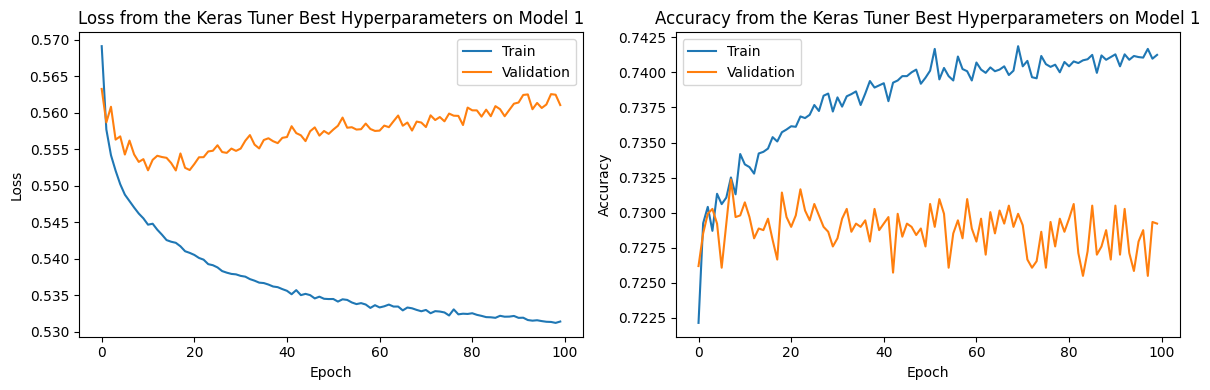

In [61]:
# Plot the loss and validation curves
plt.figure(figsize=(12, 4))

# Plot training loss curve
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Train')
plt.plot(history_1.history['val_loss'], label='Validation')
plt.title('Loss from the Keras Tuner Best Hyperparameters on Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Train')
plt.plot(history_1.history['val_accuracy'], label='Validation')
plt.title('Accuracy from the Keras Tuner Best Hyperparameters on Model 1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Model 1 loss and accuracy charts.png')

plt.show()


In [32]:
# Get the optimal hyperparameters
best_hps_2=tuner_2.get_best_hyperparameters(num_trials=1)[0]

# Create callbacks
callbacks_2_best = [
    # Create a stop early call back to prevent possible overfitting: https://www.tensorflow.org/tutorials/keras/keras_tuner
    # tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),

    # Create model checkpoint callback
    tf.keras.callbacks.ModelCheckpoint(
      filepath = 'Model_2_best/checkpoint_Epoch-{epoch:03d}_Accuracy-{accuracy:.4f}.h5',
      save_weigths_only= True,
      save_freq = 'epoch',
      period = 5,
      monitor= 'accuracy',
      mode= 'max', # set to max because checkpoint is monitoring accuracy - swithch to 'min' if monitoring loss
      verbose = 1
      )
    ]

# Build the model with the optimal hyperparameters and train it on the data for 100 epochs
model_nn_2 = tuner_2.hypermodel.build(best_hps_2)
history_2 = model_nn_2.fit(X_2_train_scaled,y_2_train,
                           epochs = 100,
                           validation_data=(X_2_test_scaled,y_2_test),
                           callbacks = [callbacks_2_best])

val_acc_per_epoch_2 = history_2.history['val_accuracy']
best_epoch_2 = val_acc_per_epoch_2.index(max(val_acc_per_epoch_2)) + 1
print('Best epoch: %d' % (best_epoch_2,))

Epoch 1/100
804/804 [==============================] - 7s 7ms/step - loss: 0.5055 - accuracy: 0.7535 - val_loss: 0.4450 - val_accuracy: 0.7890
Epoch 2/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4350 - accuracy: 0.7924 - val_loss: 0.4442 - val_accuracy: 0.7913
Epoch 3/100
804/804 [==============================] - 5s 7ms/step - loss: 0.4294 - accuracy: 0.7927 - val_loss: 0.4589 - val_accuracy: 0.7782
Epoch 4/100
804/804 [==============================] - 6s 8ms/step - loss: 0.4278 - accuracy: 0.7935 - val_loss: 0.4410 - val_accuracy: 0.7924
Epoch 5/100
796/804 [============================>.] - ETA: 0s - loss: 0.4253 - accuracy: 0.7959
Epoch 5: saving model to Model_2_best/checkpoint_Epoch-005_Accuracy-0.7962.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.4250 - accuracy: 0.7962 - val_loss: 0.4397 - val_accuracy: 0.7874
Epoch 6/100
804/804 [==============================] - 6s 8ms/step - loss: 0.4235 - accuracy: 0.7953 - val_loss: 0.4395 - 

In [33]:
# Create zip file of trial results incase Colag instance fails/disconnects
!zip -r /content/Model_2_best.zip /content/Model_2_best

  adding: content/Model_2_best/ (stored 0%)
  adding: content/Model_2_best/checkpoint_Epoch-040_Accuracy-0.8031.h5 (deflated 13%)
  adding: content/Model_2_best/checkpoint_Epoch-075_Accuracy-0.8103.h5 (deflated 14%)
  adding: content/Model_2_best/checkpoint_Epoch-055_Accuracy-0.8075.h5 (deflated 14%)
  adding: content/Model_2_best/checkpoint_Epoch-050_Accuracy-0.8044.h5 (deflated 14%)
  adding: content/Model_2_best/checkpoint_Epoch-065_Accuracy-0.8094.h5 (deflated 14%)
  adding: content/Model_2_best/checkpoint_Epoch-020_Accuracy-0.7979.h5 (deflated 12%)
  adding: content/Model_2_best/checkpoint_Epoch-090_Accuracy-0.8111.h5 (deflated 14%)
  adding: content/Model_2_best/checkpoint_Epoch-100_Accuracy-0.8104.h5 (deflated 16%)
  adding: content/Model_2_best/checkpoint_Epoch-005_Accuracy-0.7962.h5 (deflated 11%)
  adding: content/Model_2_best/checkpoint_Epoch-070_Accuracy-0.8096.h5 (deflated 14%)
  adding: content/Model_2_best/checkpoint_Epoch-080_Accuracy-0.8092.h5 (deflated 15%)
  adding: 

In [60]:
hypermodel_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 291)               130077    
                                                                 
 dense_23 (Dense)            (None, 86)                25112     
                                                                 
 dense_24 (Dense)            (None, 181)               15747     
                                                                 
 dense_25 (Dense)            (None, 11)                2002      
                                                                 
 dense_26 (Dense)            (None, 206)               2472      
                                                                 
 dense_27 (Dense)            (None, 1)                 207       
                                                                 
Total params: 175,617
Trainable params: 175,617
Non-tr

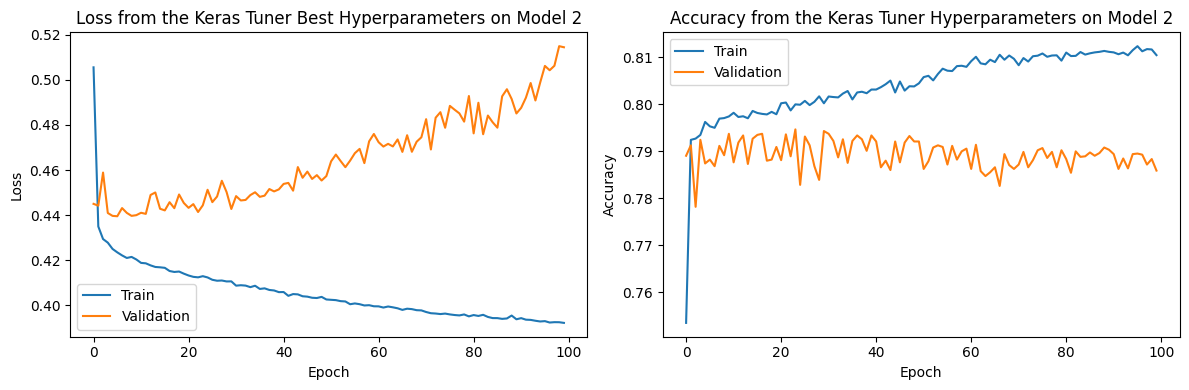

In [62]:
# Plot the loss and validation curves
plt.figure(figsize=(12, 4))

# Plot training loss curve
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Train')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.title('Loss from the Keras Tuner Best Hyperparameters on Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Train')
plt.plot(history_2.history['val_accuracy'], label='Validation')
plt.title('Accuracy from the Keras Tuner Hyperparameters on Model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Model 2 loss and accuracy charts.png')

plt.show()

In [35]:
hypermodel_1 = tuner_1.hypermodel.build(best_hps_1)

# Create callbacks
callbacks_1_retrain = [
    # Create a stop early call back to prevent possible overfitting: https://www.tensorflow.org/tutorials/keras/keras_tuner
    # tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),

    # Create model checkpoint callback
    tf.keras.callbacks.ModelCheckpoint(
      filepath = 'Model_1_retrain/checkpoint_Epoch-{epoch:03d}_Accuracy-{accuracy:.4f}.h5',
      save_weigths_only= True,
      save_freq = 'epoch',
      monitor= 'accuracy',
      mode= 'max', # set to max because checkpoint is monitoring accuracy - swithch to 'min' if monitoring loss
      verbose = 1
      )
    ]

# Retrain the model
hypermodel_fit_1 = hypermodel_1.fit(X_1_train_scaled,y_1_train, epochs=best_epoch_1,
                                    validation_data=(X_1_test_scaled,y_1_test),
                                    callbacks = [callbacks_1_retrain])

Epoch 1/8
802/804 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7206
Epoch 1: saving model to Model_1_retrain/checkpoint_Epoch-001_Accuracy-0.7207.h5
804/804 [==============================] - 3s 3ms/step - loss: 0.5700 - accuracy: 0.7207 - val_loss: 0.5615 - val_accuracy: 0.7240
Epoch 2/8
791/804 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7288
Epoch 2: saving model to Model_1_retrain/checkpoint_Epoch-002_Accuracy-0.7285.h5
804/804 [==============================] - 2s 3ms/step - loss: 0.5569 - accuracy: 0.7285 - val_loss: 0.5586 - val_accuracy: 0.7285
Epoch 3/8
802/804 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7305
Epoch 3: saving model to Model_1_retrain/checkpoint_Epoch-003_Accuracy-0.7305.h5
804/804 [==============================] - 2s 3ms/step - loss: 0.5536 - accuracy: 0.7305 - val_loss: 0.5561 - val_accuracy: 0.7307
Epoch 4/8
798/804 [============================>.] - ETA: 0s - loss: 0.5517 - a

In [36]:
# Create zip file of trial results incase Colag instance fails/disconnects
!zip -r /content/Model_1_retrain.zip /content/Model_1_retrain

  adding: content/Model_1_retrain/ (stored 0%)
  adding: content/Model_1_retrain/checkpoint_Epoch-008_Accuracy-0.7317.h5 (deflated 42%)
  adding: content/Model_1_retrain/checkpoint_Epoch-001_Accuracy-0.7207.h5 (deflated 41%)
  adding: content/Model_1_retrain/checkpoint_Epoch-007_Accuracy-0.7308.h5 (deflated 42%)
  adding: content/Model_1_retrain/checkpoint_Epoch-005_Accuracy-0.7312.h5 (deflated 42%)
  adding: content/Model_1_retrain/checkpoint_Epoch-006_Accuracy-0.7311.h5 (deflated 42%)
  adding: content/Model_1_retrain/checkpoint_Epoch-004_Accuracy-0.7293.h5 (deflated 41%)
  adding: content/Model_1_retrain/checkpoint_Epoch-002_Accuracy-0.7285.h5 (deflated 41%)
  adding: content/Model_1_retrain/checkpoint_Epoch-003_Accuracy-0.7305.h5 (deflated 41%)


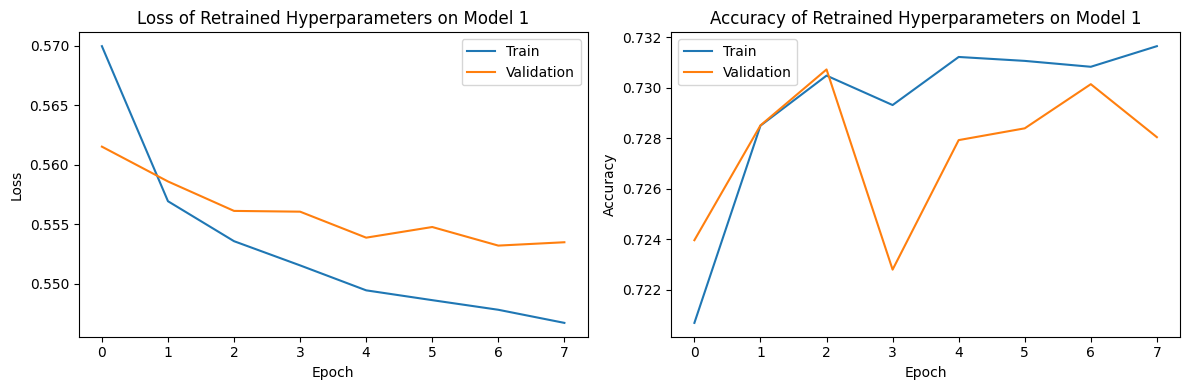

In [65]:
# Plot the loss and validation curves
plt.figure(figsize=(12, 4))

# Plot training loss curve
plt.subplot(1, 2, 1)
plt.plot(hypermodel_fit_1.history['loss'], label='Train')
plt.plot(hypermodel_fit_1.history['val_loss'], label='Validation')
plt.title('Loss of Retrained Hyperparameters on Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy curve
plt.subplot(1, 2, 2)
plt.plot(hypermodel_fit_1.history['accuracy'], label='Train')
plt.plot(hypermodel_fit_1.history['val_accuracy'], label='Validation')
plt.title('Accuracy of Retrained Hyperparameters on Model 1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Retrain model 1 loss and accuracy charts.png')

plt.show()

In [38]:
hypermodel_2 = tuner_2.hypermodel.build(best_hps_2)

# Create callbacks
callbacks_2_retrain = [
    # Create a stop early call back to prevent possible overfitting: https://www.tensorflow.org/tutorials/keras/keras_tuner
    # tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),

    # Create model checkpoint callback
    tf.keras.callbacks.ModelCheckpoint(
      filepath = 'Model_2_retrain/checkpoint_Epoch-{epoch:03d}_Accuracy-{accuracy:.4f}.h5',
      save_weigths_only= True,
      save_freq = 'epoch',
      monitor= 'accuracy',
      mode= 'max', # set to max because checkpoint is monitoring accuracy - swithch to 'min' if monitoring loss
      verbose = 1
      )
    ]
# Retrain the model
hypermodel_fit_2 = hypermodel_2.fit(X_2_train_scaled,y_2_train, epochs=best_epoch_2,
                                    validation_data=(X_2_test_scaled,y_2_test),
                                    callbacks = [callbacks_2_retrain])

Epoch 1/24
804/804 [==============================] - ETA: 0s - loss: 0.5054 - accuracy: 0.7543
Epoch 1: saving model to Model_2_retrain/checkpoint_Epoch-001_Accuracy-0.7543.h5
804/804 [==============================] - 8s 8ms/step - loss: 0.5054 - accuracy: 0.7543 - val_loss: 0.4836 - val_accuracy: 0.7605
Epoch 2/24
798/804 [============================>.] - ETA: 0s - loss: 0.4363 - accuracy: 0.7912
Epoch 2: saving model to Model_2_retrain/checkpoint_Epoch-002_Accuracy-0.7912.h5
804/804 [==============================] - 5s 7ms/step - loss: 0.4363 - accuracy: 0.7912 - val_loss: 0.4427 - val_accuracy: 0.7894
Epoch 3/24
801/804 [============================>.] - ETA: 0s - loss: 0.4305 - accuracy: 0.7924
Epoch 3: saving model to Model_2_retrain/checkpoint_Epoch-003_Accuracy-0.7927.h5
804/804 [==============================] - 6s 8ms/step - loss: 0.4302 - accuracy: 0.7927 - val_loss: 0.4390 - val_accuracy: 0.7871
Epoch 4/24
802/804 [============================>.] - ETA: 0s - loss: 0.4265

In [39]:
# Create zip file of trial results incase Colag instance fails/disconnects
!zip -r /content/Model_2_retrain.zip /content/Model_2_retrain

  adding: content/Model_2_retrain/ (stored 0%)
  adding: content/Model_2_retrain/checkpoint_Epoch-002_Accuracy-0.7912.h5 (deflated 10%)
  adding: content/Model_2_retrain/checkpoint_Epoch-022_Accuracy-0.8003.h5 (deflated 11%)
  adding: content/Model_2_retrain/checkpoint_Epoch-007_Accuracy-0.7945.h5 (deflated 12%)
  adding: content/Model_2_retrain/checkpoint_Epoch-012_Accuracy-0.7970.h5 (deflated 11%)
  adding: content/Model_2_retrain/checkpoint_Epoch-018_Accuracy-0.7981.h5 (deflated 12%)
  adding: content/Model_2_retrain/checkpoint_Epoch-017_Accuracy-0.7992.h5 (deflated 12%)
  adding: content/Model_2_retrain/checkpoint_Epoch-024_Accuracy-0.8012.h5 (deflated 12%)
  adding: content/Model_2_retrain/checkpoint_Epoch-014_Accuracy-0.7979.h5 (deflated 11%)
  adding: content/Model_2_retrain/checkpoint_Epoch-004_Accuracy-0.7950.h5 (deflated 11%)
  adding: content/Model_2_retrain/checkpoint_Epoch-015_Accuracy-0.7971.h5 (deflated 11%)
  adding: content/Model_2_retrain/checkpoint_Epoch-021_Accuracy

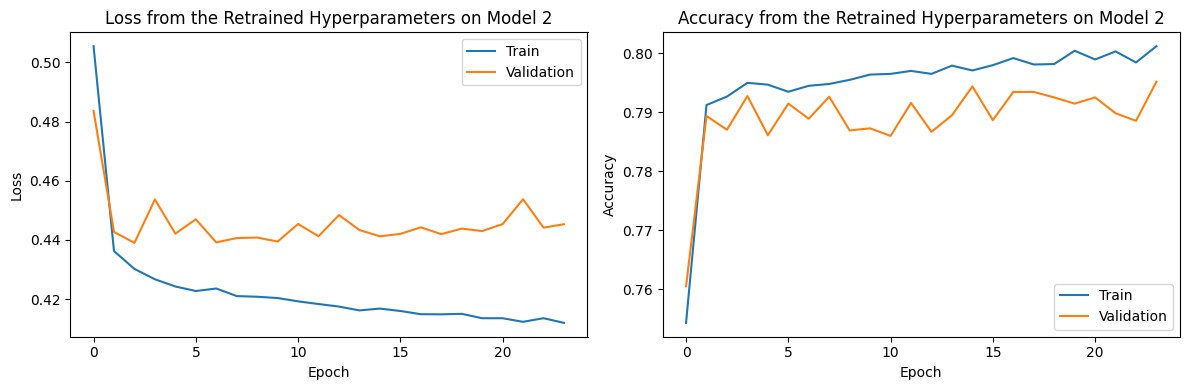

In [64]:
# Plot the loss and validation curves
plt.figure(figsize=(12, 4))

# Plot training loss curve
plt.subplot(1, 2, 1)
plt.plot(hypermodel_fit_2.history['loss'], label='Train')
plt.plot(hypermodel_fit_2.history['val_loss'], label='Validation')
plt.title('Loss from the Retrained Hyperparameters on Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy curve
plt.subplot(1, 2, 2)
plt.plot(hypermodel_fit_2.history['accuracy'], label='Train')
plt.plot(hypermodel_fit_2.history['val_accuracy'], label='Validation')
plt.title('Accuracy from the Retrained Hyperparameters on Model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Retrain model 2 loss and accuracy charts.png')
plt.show()

In [41]:
# Compute the ability of Model 1 (w/o 'NAMES' column) to model the data
eval_result_1 = hypermodel_1.evaluate(X_1_test_scaled,y_1_test)
print("[test loss, test accuracy]:", eval_result_1)



268/268 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7280
[test loss, test accuracy]: [0.5534773468971252, 0.7280466556549072]


In [42]:
# Compute the ability of Model 2 (w/ 'NAMES' column) to model the data
eval_result_2 = hypermodel_2.evaluate(X_2_test_scaled,y_2_test)
print("[test loss, test accuracy]:", eval_result_2)

268/268 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.7952
[test loss, test accuracy]: [0.44532305002212524, 0.7952186465263367]


In [43]:
# Print out best hyperparameter from Model_2 (w/ "NAMES")
first_hyper = tuner_2.get_best_hyperparameters(3)[0]
first_hyper.values


{'activation': 'sigmoid',
 'first_units': 291,
 'num_layers': 4,
 'units_0': 86,
 'units_1': 181,
 'units_2': 11,
 'units_3': 206,
 'units_4': 311,
 'units_5': 81,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [44]:
# Print out second best hyperparameter from Model_2 (w/ "NAMES")
second_hyper = tuner_2.get_best_hyperparameters(3)[1]
second_hyper.values

{'activation': 'relu',
 'first_units': 16,
 'num_layers': 2,
 'units_0': 241,
 'units_1': 51,
 'units_2': 86,
 'units_3': 111,
 'units_4': 401,
 'units_5': 396,
 'tuner/epochs': 4,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [49]:
# Lets 'take it to 11' and have the same number of neurons as for each layer.
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_2_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 100
activation = 'sigmoid' # the last time Keras tuner was ran, sigmoid was in the top five

nn_model_3 = tf.keras.models.Sequential()

# First hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=activation))

# Second hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=activation))

# Third hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=activation))

# Fourth hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation=activation))

# Fifth hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation=activation))

# Output layer
nn_model_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 100)               44700     
                                                                 
 dense_35 (Dense)            (None, 100)               10100     
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 85,201
Trainable params: 85,201
Non-trai

In [50]:
callbacks_3 = [
    # Create a stop early call back to prevent possible overfitting: https://www.tensorflow.org/tutorials/keras/keras_tuner
    # tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),

    # Create model checkpoint callback
    tf.keras.callbacks.ModelCheckpoint(
      filepath = 'Model_3_checkpoint/checkpoint_Epoch-{epoch:003d}_Accuracy-{accuracy:.4f}.h5',
      save_weigths_only= True,
      save_freq = 'epoch',
      period = 10,
      monitor= 'accuracy',
      mode= 'max', # set to max because checkpoint is monitoring accuracy - swithch to 'min' if monitoring loss
      verbose = 1
      )
    ]

In [51]:
# Compile the model
nn_model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Train the model
history_3 = nn_model_3.fit(X_2_train_scaled, y_2_train, epochs=100,
                           validation_data=(X_2_test_scaled,y_2_test),
                           callbacks = [callbacks_3])

val_acc_per_epoch_3 = history_3.history['val_accuracy']
best_epoch_3 = val_acc_per_epoch_3.index(max(val_acc_per_epoch_3)) + 1
print('Best epoch: %d' % (best_epoch_3,))

Epoch 1/100
804/804 [==============================] - 5s 4ms/step - loss: 0.5145 - accuracy: 0.7394 - val_loss: 0.4476 - val_accuracy: 0.7899
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4375 - accuracy: 0.7915 - val_loss: 0.4418 - val_accuracy: 0.7938
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4305 - accuracy: 0.7926 - val_loss: 0.4419 - val_accuracy: 0.7893
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.4279 - accuracy: 0.7933 - val_loss: 0.4404 - val_accuracy: 0.7894
Epoch 5/100
804/804 [==============================] - 4s 4ms/step - loss: 0.4248 - accuracy: 0.7946 - val_loss: 0.4442 - val_accuracy: 0.7915
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4251 - accuracy: 0.7945 - val_loss: 0.4457 - val_accuracy: 0.7880
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.4227 - accuracy: 0.7953 - val_loss: 0.4427 - val_accuracy: 0.7922

In [54]:
# Create zip file of trial results incase Colab instance fails/disconnects
!zip -r /content/Model_3_checkpoint.zip /content/Model_3_checkpoint

  adding: content/Model_3_checkpoint/ (stored 0%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-080_Accuracy-0.8109.h5 (deflated 17%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-030_Accuracy-0.8012.h5 (deflated 14%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-090_Accuracy-0.8100.h5 (deflated 17%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-020_Accuracy-0.7984.h5 (deflated 13%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-100_Accuracy-0.8108.h5 (deflated 18%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-050_Accuracy-0.8068.h5 (deflated 15%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-040_Accuracy-0.8050.h5 (deflated 15%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-070_Accuracy-0.8096.h5 (deflated 17%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-010_Accuracy-0.7954.h5 (deflated 13%)
  adding: content/Model_3_checkpoint/checkpoint_Epoch-060_Accuracy-0.8085.h5 (deflated 16%)


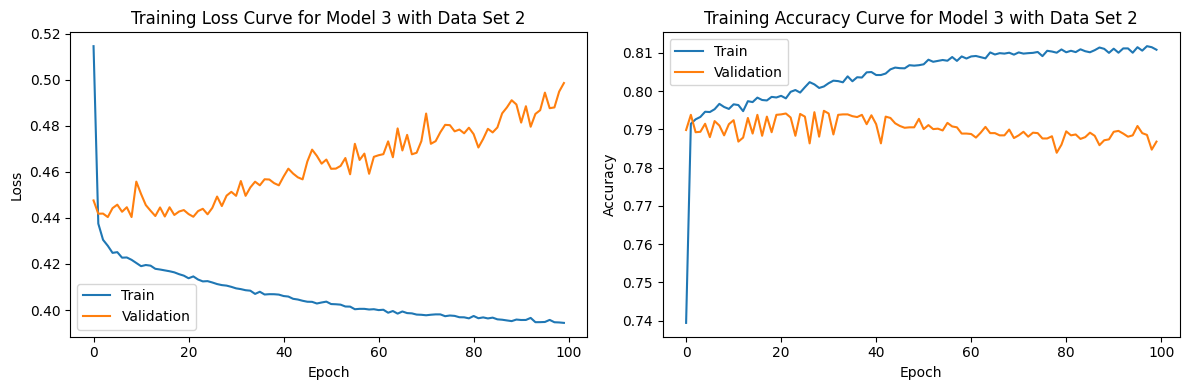

In [55]:
# Plot the loss and validation curves
plt.figure(figsize=(12, 4))

# Plot training loss curve
plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Train')
plt.plot(history_3.history['val_loss'], label='Validation')
plt.title('Training Loss Curve for Model 3 with Data Set 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'], label='Train')
plt.plot(history_3.history['val_accuracy'], label='Validation')
plt.title('Training Accuracy Curve for Model 3 with Data Set 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Model 3 loss and accuracy charts.png')
plt.show()

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_3.evaluate(X_2_test_scaled,y_2_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 1s - loss: 0.4985 - accuracy: 0.7868 - 557ms/epoch - 2ms/step
Loss: 0.49854370951652527, Accuracy: 0.7868221402168274


In [57]:
# Export the model to HDF5 file
hypermodel_1.save('hypermodel_1_v3.h5')
hypermodel_2.save('hypermodel_2_v3.h5')
nn_model_3.save('manual_model_3_v3.h5')